### Unsupervised Machine Learning
Demo 1: Data Pre-processing Techniques: Analysing Engineering Graduate Salary


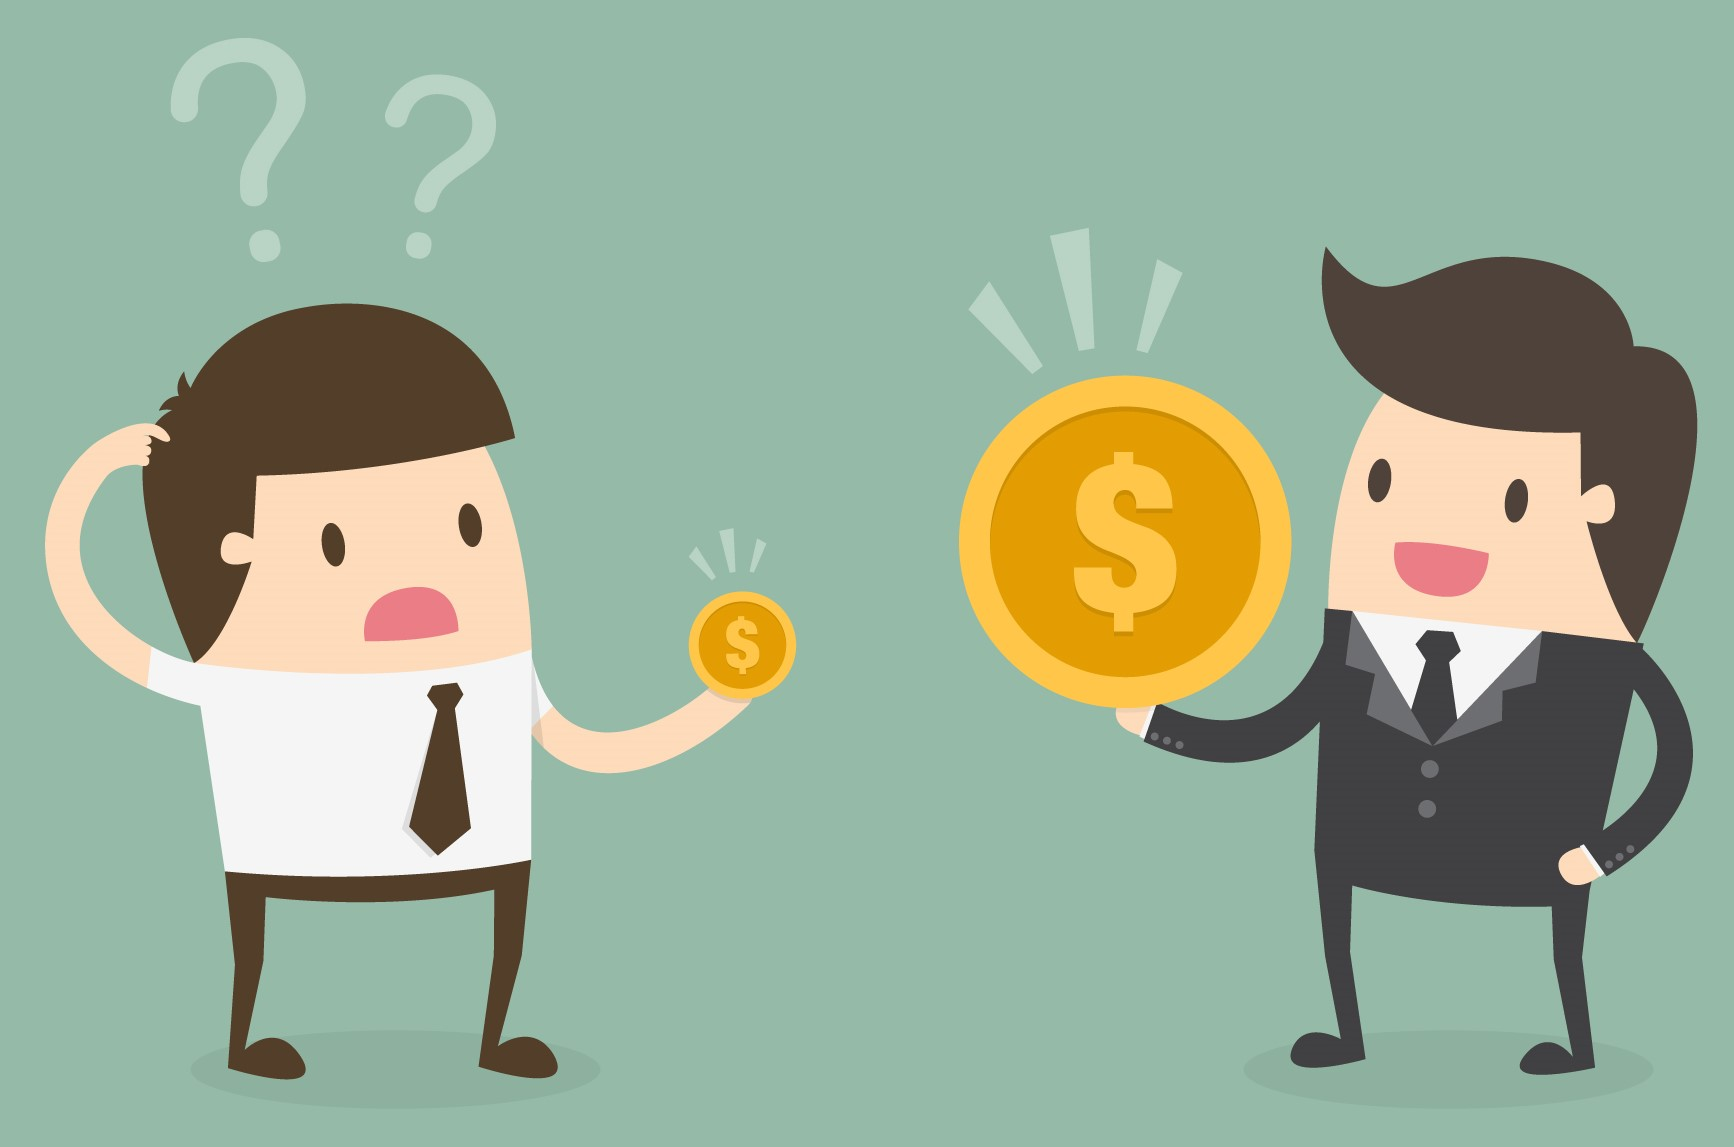

### Business Scenario



India has a total 6,214 Engineering and Technology Institutions in which around 2.9 million students are enrolled.

Every year on an average 1.5 million students get their degree in engineering, but due to lack of skill required to perform technical jobs less than 20 percent get employment in their core domain.

Perform an analysis and put forth obeservation and inference from the given dataset



### Dataset Attributes:
1. ID: A unique ID to identify a candidate

2. Salary: Annual CTC offered to the candidate (in INR)

3. Gender: Candidate's gender

4. 10percentage: Overall marks obtained in grade 10 examinations

5. 10board: The school board whose curriculum the candidate followed in grade 10

6. 12graduation: Year of graduation - senior year high school

7. 12percentage: Overall marks obtained in grade 12 examinations

8. 12board: The school board whose curriculum the candidate followed

9. CollegeID: Unique ID identifying the university/college which the candidate
attended for her/his undergraduate

10. CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.

11. Degree: Degree obtained/pursued by the candidate

12. Specialization: Specialization pursued by the candidate

13. CollegeGPA: Aggregate GPA at graduation

14. CollegeCityID: A unique ID to identify the city in which the college is located in.

15. CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.

16. CollegeState: Name of the state in which the college is located

17. GraduationYear: Year of graduation (Bachelor's degree)

18. English: Scores in AMCAT English section

19. Logical: Score in AMCAT Logical ability section

20. Quant: Score in AMCAT's Quantitative ability section

21. Domain: Scores in AMCAT's domain module

22. ComputerProgramming: Score in AMCAT's Computer programming section

23. ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
24. ComputerScience: Score in AMCAT's Computer Science section

25. MechanicalEngg: Score in AMCAT's Mechanical Engineering section

26. ElectricalEngg: Score in AMCAT's Electrical Engineering section

27. TelecomEngg: Score in AMCAT's Telecommunication Engineering section

28. CivilEngg: Score in AMCAT's Civil Engineering section

29. conscientiousness: Scores in one of the sections of AMCAT's personality test

30. agreeableness: Scores in one of the sections of AMCAT's personality test

31. extraversion: Scores in one of the sections of AMCAT's personality test

32. nueroticism: Scores in one of the sections of AMCAT's personality test

33. openesstoexperience: Scores in one of the sections of AMCAT's personality test

### Load the Datset and understand the dataset:


Let's analyze this data based on the below questions:

__1. How to analyse the dataset?__

In [14]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [15]:

#!wget https://www.dropbox.com/s/djq54unwigmey9r/1260_m1_Data%20Preprocessing_csv.csv?dl=0


In [16]:
#data = pd.read_csv('/content/1260_m1_Data Preprocessing_csv.csv?dl=0') # Loading the dataste (.csv file)
data = pd.read_csv('Engineering_graduate_salary.csv') # Loading the dataste (.csv file)
data.head() # Printing first 5 rows of the DataFrame


,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [18]:
#Checking missing values
null_columns = data.isnull().sum()
null_columns = null_columns[null_columns > 0]  # Filter only columns with null values

# Display the result
if not null_columns.empty:
    print(null_columns)
else:
    print("No missing values found!")

No missing values found!


### Inference:

1. In the Dataset there are 2998 records of Engineering students and total of 33 columns

2. Using .info() we get a list of columns, non-null count, dtypes( Data types)

3. Using .isnull.sum - We get a list of count of values that are null in the dataset. (Here English contains 524 null values )




__2. How to differentiate between different kind of values and how to handle the null values?__



In [19]:
# I want to get a list of all categorical variable values
# Object will get the list of all the categorical values present in the dataset
data.select_dtypes('object').columns


Index(['Gender', 'DOB', '10board', '12board', 'Degree', 'Specialization',
       'CollegeState'],
      dtype='object')

In [20]:
# Replace the missing value?
from sklearn.impute import SimpleImputer
si = SimpleImputer()
si.fit(data[['English']]) # Replace missing values with corresponding mean because
#underlying distribution of English scores follow a symmetrical distribution and hence, we have chosen mean.


SimpleImputer()

In [21]:
# We cannot perform SimpleImputer method on categorical data and the dataset contains both
# So we will create a seperate dataframe with just the numerical data of the missing values and 
# then we will replace the null values with mean

English_df = pd.DataFrame(si.transform(data[['English']].values),columns=['English'])
English_df.head()

c:\Workspace\MyProjects\MachineLearning\ml_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,English
0,650.0
1,440.0
2,485.0
3,675.0
4,575.0


Inference - We are replacing the null value with mean for 'English' because underlying distribution of English scores follow a symmetrical distribution and hence, we have chosen mean.

In [22]:
data_new = data.drop(['English'],axis=1)
data_new_wo_mv = pd.concat([data_new, English_df],axis=1)
data_new_wo_mv.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
English                  0
dtype: int64

In [23]:
data_new_wo_mv.isnull().sum()
#data_new.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
English                  0
dtype: int64

### Inference:

1. In the Dataset there are 2998 records of Engineering students and total of 34 columns

2. Using .info() we get a list of columns, non-null count, dtypes( Data types)

3. Using .isnull.sum - We get a list of count of values that are null in the dataset. (Here English contains 524 null values )




__3. How to convert categorical value to numerical value ?__



In [24]:
data_new_wo_mv.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
English                  0
dtype: int64

In [25]:
# Getting the list of categorical values
print("the categorical value are: ")
data_new_wo_mv.select_dtypes('object').columns

the categorical value are: 


Index(['Gender', 'DOB', '10board', '12board', 'Degree', 'Specialization',
       'CollegeState'],
      dtype='object')

In [26]:
# I want to get a list of all categorical variable columns
data_new_wo_mv.select_dtypes('object').columns

Index(['Gender', 'DOB', '10board', '12board', 'Degree', 'Specialization',
       'CollegeState'],
      dtype='object')

In [27]:
# I want to create dummy variable from all of these categroical columns
# USE IT ONLY WHEN CATEGORICAL COLUMNS ARE NOMINAL
# IF ORDINAL -- USE LABELENCODER
data_numerical = pd.get_dummies(data = data_new_wo_mv,columns=['Gender', '10board', '12board', 'Specialization', 'CollegeState'],drop_first=True)

In [28]:
data_numerical.head()

,ID,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,604399,1990-10-22,87.80,2009,84.00,6920,1,B.Tech/B.E.,73.82,6920,...,False,False,False,False,False,False,False,False,False,False
1,988334,1990-05-15,57.00,2010,64.50,6624,2,B.Tech/B.E.,65.00,6624,...,False,False,False,False,False,False,False,True,False,False
2,301647,1989-08-21,77.33,2007,85.17,9084,2,B.Tech/B.E.,61.94,9084,...,False,False,False,False,False,False,False,False,False,False
3,582313,1991-05-04,84.30,2009,86.00,8195,1,B.Tech/B.E.,80.40,8195,...,False,False,False,False,False,False,False,False,False,False
4,339001,1990-10-30,82.00,2008,75.00,4889,2,B.Tech/B.E.,64.30,4889,...,False,False,False,False,True,False,False,False,False,False


**Using Label Encoder**


In [29]:
data_numerical['Degree'].unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

Dropping the 'ID' variable[link text]

In [30]:
data_numerical.drop('ID',axis=1, inplace=True)


In [31]:
data_numerical.head()

,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,CollegeCityTier,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,1990-10-22,87.80,2009,84.00,6920,1,B.Tech/B.E.,73.82,6920,1,...,False,False,False,False,False,False,False,False,False,False
1,1990-05-15,57.00,2010,64.50,6624,2,B.Tech/B.E.,65.00,6624,0,...,False,False,False,False,False,False,False,True,False,False
2,1989-08-21,77.33,2007,85.17,9084,2,B.Tech/B.E.,61.94,9084,0,...,False,False,False,False,False,False,False,False,False,False
3,1991-05-04,84.30,2009,86.00,8195,1,B.Tech/B.E.,80.40,8195,1,...,False,False,False,False,False,False,False,False,False,False
4,1990-10-30,82.00,2008,75.00,4889,2,B.Tech/B.E.,64.30,4889,1,...,False,False,False,False,True,False,False,False,False,False


In [32]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Degree'.
data_numerical['Degree']= label_encoder.fit_transform(data_new['Degree'])

data_numerical['Degree'].unique()


array([0, 2, 3, 1])

In [33]:
data_numerical.head()

,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,CollegeCityTier,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,1990-10-22,87.80,2009,84.00,6920,1,0,73.82,6920,1,...,False,False,False,False,False,False,False,False,False,False
1,1990-05-15,57.00,2010,64.50,6624,2,0,65.00,6624,0,...,False,False,False,False,False,False,False,True,False,False
2,1989-08-21,77.33,2007,85.17,9084,2,0,61.94,9084,0,...,False,False,False,False,False,False,False,False,False,False
3,1991-05-04,84.30,2009,86.00,8195,1,0,80.40,8195,1,...,False,False,False,False,False,False,False,False,False,False
4,1990-10-30,82.00,2008,75.00,4889,2,0,64.30,4889,1,...,False,False,False,False,True,False,False,False,False,False


In [34]:
data_numerical.to_csv('engineering_graduate_salary_processed.csv')

### Inference:

1. We have used two techniques for converting categorical to numerical conversion

> - get-dummies if the category is nominal. Eg - Gender', '10board', '12board', 'Specialization', 'CollegeState

> - Label-encoder if the category is ordinal. E.g - Degree


__4. What is the correlation between the all the variables ?__



In [35]:
# print all the columns
data_numerical.columns

Index(['DOB', '10percentage', '12graduation', '12percentage', 'CollegeID',
       'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier',
       ...
       'CollegeState_Orissa', 'CollegeState_Punjab', 'CollegeState_Rajasthan',
       'CollegeState_Sikkim', 'CollegeState_Tamil Nadu',
       'CollegeState_Telangana', 'CollegeState_Union Territory',
       'CollegeState_Uttar Pradesh', 'CollegeState_Uttarakhand',
       'CollegeState_West Bengal'],
      dtype='object', length=591)

In [36]:
# handle the DOB column (its has date value like '1990-10-22' which can't be converted into float) 
# lets convert it to age by subtracting it from the current year and store it in a new column 'Age' 
# and then drop the DOB column as it is no longer needed
from datetime import datetime
today = datetime.today()
#print(today.month)

data_numerical['DOB'] = pd.to_datetime(data_numerical['DOB'])
data_numerical['Age'] = data_numerical['DOB'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
data_numerical.drop('DOB',axis=1,inplace=True)

data_numerical.head()

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal,Age
0,87.80,2009,84.00,6920,1,0,73.82,6920,1,2013,...,False,False,False,False,False,False,False,False,False,34
1,57.00,2010,64.50,6624,2,0,65.00,6624,0,2014,...,False,False,False,False,False,False,True,False,False,34
2,77.33,2007,85.17,9084,2,0,61.94,9084,0,2011,...,False,False,False,False,False,False,False,False,False,35
3,84.30,2009,86.00,8195,1,0,80.40,8195,1,2013,...,False,False,False,False,False,False,False,False,False,33
4,82.00,2008,75.00,4889,2,0,64.30,4889,1,2012,...,False,False,False,True,False,False,False,False,False,34


In [37]:

from sklearn.preprocessing import scale   #StandardScaler, MinMaxScaler
data_numerical_scaled = pd.DataFrame(scale(data_numerical),columns=data_numerical.columns)

data_numerical_scaled.head()

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal,Age
0,1.013260,0.563442,0.868731,0.358010,-3.502212,-0.292641,0.284462,0.358010,1.541469,0.028825,...,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441,0.150691
1,-2.066396,1.176359,-0.885111,0.296031,0.285534,-0.292641,-0.801597,0.296031,-0.648732,0.056018,...,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,1.815249,-0.166638,-0.225441,0.150691
2,-0.033623,-0.662392,0.973962,0.811127,0.285534,-0.292641,-1.178393,0.811127,-0.648732,-0.025560,...,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441,0.720388
3,0.663300,0.563442,1.048612,0.624980,-3.502212,-0.292641,1.094696,0.624980,1.541469,0.028825,...,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441,-0.419007
4,0.433325,-0.049475,0.059265,-0.067258,0.285534,-0.292641,-0.887792,-0.067258,1.541469,0.001633,...,-0.222154,-0.209456,-0.025837,3.218083,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441,0.150691


In [38]:

data_numerical_scaled.head()
# If we observe the values there's a huge imbalance in the dataset in terms of length of numbers (e.g ID is 6 digit number while salary are 8 digits or more).
# Due to this the model will give more priority to bigger numbers that can hamper the model accuracy
# So we have to perform Scaling to compare on common grounds

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal,Age
0,1.013260,0.563442,0.868731,0.358010,-3.502212,-0.292641,0.284462,0.358010,1.541469,0.028825,...,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441,0.150691
1,-2.066396,1.176359,-0.885111,0.296031,0.285534,-0.292641,-0.801597,0.296031,-0.648732,0.056018,...,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,1.815249,-0.166638,-0.225441,0.150691
2,-0.033623,-0.662392,0.973962,0.811127,0.285534,-0.292641,-1.178393,0.811127,-0.648732,-0.025560,...,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441,0.720388
3,0.663300,0.563442,1.048612,0.624980,-3.502212,-0.292641,1.094696,0.624980,1.541469,0.028825,...,-0.222154,-0.209456,-0.025837,-0.310744,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441,-0.419007
4,0.433325,-0.049475,0.059265,-0.067258,0.285534,-0.292641,-0.887792,-0.067258,1.541469,0.001633,...,-0.222154,-0.209456,-0.025837,3.218083,-0.300962,-0.040873,-0.550889,-0.166638,-0.225441,0.150691


**Standard Scaler**- The StandardScaler assumes that the data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of

> Formula = xi- Mean(x)/ Stdev(x)



**Min-Max Scaler** - It  shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

* It works best for cases in which the standard scaler might not work so well.
* If the distribution is not Gaussian or the standard deviation is very small, this scaler works best.

> Formula = xi-min(x) / max(x)-min(x)



**Robust Scaler**- It uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers.


> Formula = xi- Q1(x) / Q3(x)-Q1(x)


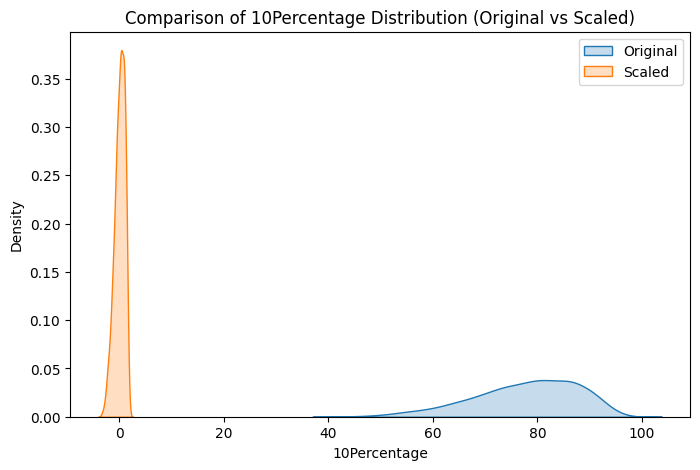

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

#sns.displot(data_numerical_scaled['10percentage'])
sns.kdeplot(data=data_numerical, x='10percentage', label='Original', fill=True)
sns.kdeplot(data=data_numerical_scaled, x='10percentage', label='Scaled', fill=True)

# Add labels and legend
plt.xlabel('10Percentage')
plt.ylabel('Density')
plt.title('Comparison of 10Percentage Distribution (Original vs Scaled)')
plt.legend()
plt.show()

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#MinMax Scalar
scaler = MinMaxScaler()
df = data_numerical.copy() #pd.read_csv("engineering_graduate_salary_processed.csv")
df_minmax_scaled = df.copy()
col_names = ['10percentage', '12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']
features = df_minmax_scaled[col_names]
df_minmax_scaled[col_names] = scaler.fit_transform(features.values)
df_minmax_scaled.to_csv('minmax.csv')

#Standard Scalar
scaler = StandardScaler()
df_standard_scaled = df.copy()
col_names = ['10percentage', '12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']
features = df_standard_scaled[col_names]
df_standard_scaled[col_names] = scaler.fit_transform(features.values)
df_standard_scaled.to_csv('standard.csv')

#Robust Scalar
scaler = RobustScaler()
df_robust_scaled = df.copy()
col_names = ['10percentage', '12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']
features = df_robust_scaled[col_names]
df_robust_scaled[col_names] = scaler.fit_transform(features.values)
df_robust_scaled.to_csv('robust.csv')


print("MinMax Scalar\n",df_minmax_scaled.head())
print("standard Scalar\n",df_standard_scaled.head())
print("Robust Scalar\n",df_robust_scaled.head())


MinMax Scalar
    10percentage  12graduation  12percentage  CollegeID  CollegeTier  Degree  \
0      0.818115          2009      0.749574       6920            1       0   
1      0.255661          2010      0.417376       6624            2       0   
2      0.626917          2007      0.769506       9084            2       0   
3      0.754200          2009      0.783646       8195            1       0   
4      0.712199          2008      0.596252       4889            2       0   

   collegeGPA  CollegeCityID  CollegeCityTier  GraduationYear  ...  \
0    0.720150           6920                1            2013  ...   
1    0.625616           6624                0            2014  ...   
2    0.592819           9084                0            2011  ...   
3    0.790675           8195                1            2013  ...   
4    0.618114           4889                1            2012  ...   

   CollegeState_Punjab  CollegeState_Rajasthan  CollegeState_Sikkim  \
0                F

In [50]:
df = pd.DataFrame(data_numerical[['Salary','12graduation',]].values, columns=['Salary','12graduation'])
df.head()

,Salary,12graduation
0,445000,2009
1,110000,2010
2,255000,2007
3,420000,2009
4,200000,2008


In [52]:
# MIN MAX SCALER
df_scaled = df.copy()
col_names = ['Salary','12graduation']
features = df_scaled[col_names]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled.head()

,Salary,12graduation
0,0.103405,0.785714
1,0.018916,0.857143
2,0.055485,0.642857
3,0.097100,0.785714
4,0.041614,0.714286


In [53]:
# STANDARD SCALER
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled.head()

,Salary,12graduation
0,0.658634,0.563442
1,-0.919353,1.176359
2,-0.236344,-0.662392
3,0.540874,0.563442
4,-0.495416,-0.049475


In [54]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled.head()

,Salary,12graduation
0,0.763158,0.5
1,-1.000000,1.0
2,-0.236842,-0.5
3,0.631579,0.5
4,-0.526316,0.0


### Inference:

1. We have used 3 techniques for scaling. Scaling is required because it helps to compare variables on common grounds

> - get-dummies if the category is nominal. Eg - Gender', '10board', '12board', 'Specialization', 'CollegeState

> - Label-encoder if the category is ordinal. E.g - Degree


__5. Among these many numbers of variables how do we know which variable is the best correlated with the target variable ?__



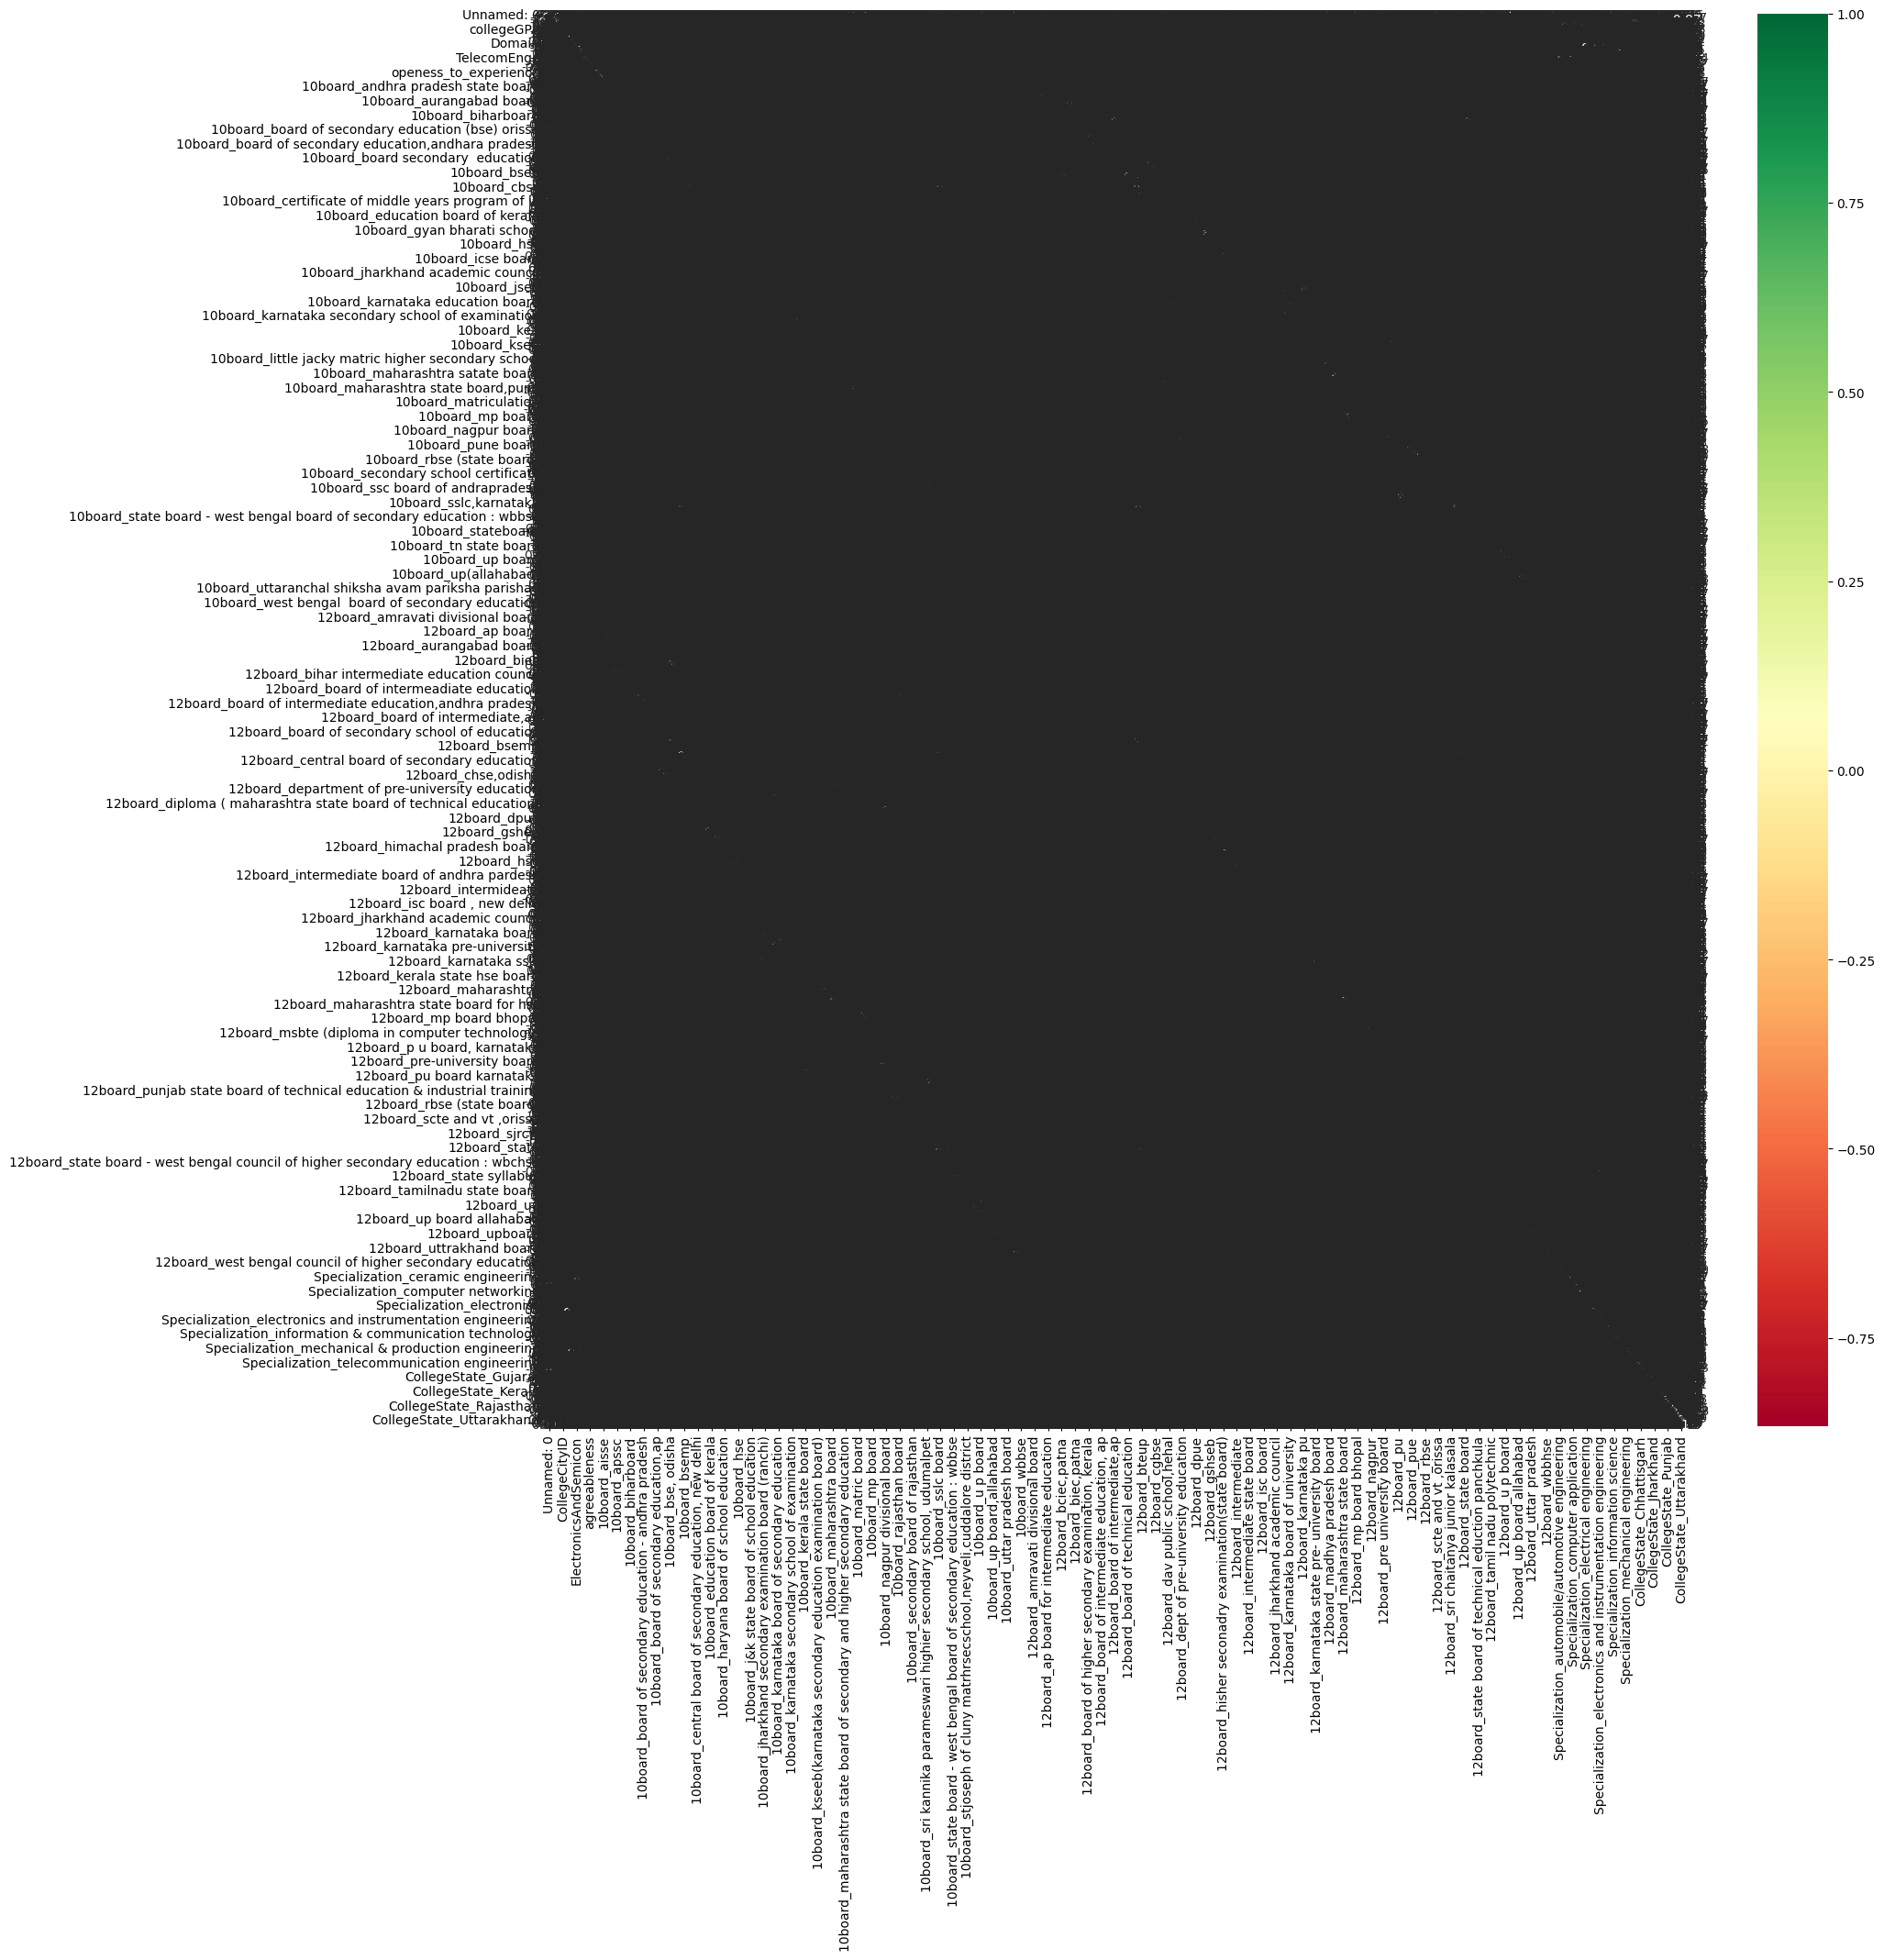

In [62]:

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#import the dataset
df = pd.read_csv("engineering_graduate_salary_processed.csv")

today = datetime.today()
#print(today.month)
df['DOB'] = pd.to_datetime(df['DOB'])
df['Age'] = df['DOB'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
df.drop(['DOB','CollegeID'],axis=1,inplace=True)

#getting correlations of each features in dataset
corr_mat = df.corr()
top_corr_features = corr_mat.index

#plot the figure using matplot lib
plt.figure(figsize=(20,20))

#plot heat map using seaborn
x=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [48]:
data_numerical.corr()

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal,Age
10percentage,1.000000,0.273813,0.645578,0.028314,-0.144178,-0.257496,0.311209,0.028314,0.114770,-0.017208,...,-0.018730,-0.044110,-0.014251,0.109434,0.135223,0.013461,-0.249597,-0.051563,-0.001741,-0.249370
12graduation,0.273813,1.000000,0.255780,0.247979,0.004834,-0.373734,0.059786,0.247979,0.005517,0.006758,...,0.058538,-0.026665,0.006640,-0.005995,0.077713,0.023029,-0.076596,0.027062,0.033635,-0.866420
12percentage,0.645578,0.255780,1.000000,0.027538,-0.113101,-0.237543,0.335041,0.027538,0.119783,-0.015845,...,-0.035455,-0.072238,-0.018918,0.146044,0.307953,0.015208,-0.191773,-0.054791,-0.060357,-0.267327
CollegeID,0.028314,0.247979,0.027538,1.000000,0.072848,-0.066321,0.002161,1.000000,0.026276,-0.003479,...,-0.092843,0.054729,-0.027668,-0.032904,0.144420,0.028478,-0.148426,0.101100,0.085614,-0.230726
CollegeTier,-0.144178,0.004834,-0.113101,0.072848,1.000000,0.000547,-0.088604,0.072848,-0.094247,-0.006719,...,-0.073827,0.009434,0.007377,0.075353,0.049309,0.011670,0.076583,0.008619,0.034926,-0.017835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CollegeState_Union Territory,0.013461,0.023029,0.015208,0.028478,0.011670,-0.011961,0.017465,0.028478,-0.026515,0.000956,...,-0.009080,-0.008561,-0.001056,-0.012701,-0.012301,1.000000,-0.022516,-0.006811,-0.009214,-0.012469
CollegeState_Uttar Pradesh,-0.249597,-0.076596,-0.191773,-0.148426,0.076583,-0.019880,-0.112599,-0.148426,-0.357379,-0.032409,...,-0.122382,-0.115387,-0.014233,-0.171185,-0.165797,-0.022516,1.000000,-0.091799,-0.124193,0.007926
CollegeState_Uttarakhand,-0.051563,0.027062,-0.054791,0.101100,0.008619,0.038698,-0.007250,0.101100,-0.108103,0.005307,...,-0.037019,-0.034903,-0.004305,-0.051782,-0.050152,-0.006811,-0.091799,1.000000,-0.037567,-0.037006
CollegeState_West Bengal,-0.001741,0.033635,-0.060357,0.085614,0.034926,-0.015898,0.156633,0.085614,0.180653,0.005991,...,-0.050083,-0.047220,-0.005825,-0.070054,-0.067849,-0.009214,-0.124193,-0.037567,1.000000,0.016257


### Inference:

1. We see that percentages and CGPA are the best correlated

2. ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg,     extraversion, nueroticism, openesstoexperience are the variables which are least correlated